# Table of contents

6. [EDA & Model for Null BsmtQual](#BsmtEDA)

# 6) EDA & Model for Null BsmtQual<a name="BsmtEDA"></a>
Designing the model for filling in Nulls in BsmtQual in Test data. Model was applied above.

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, LassoCV, Lasso, RidgeCV, Ridge, ElasticNetCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

from IPython.display import display
pd.options.display.max_columns = None

%matplotlib inline

In [2]:
## Importing data
train = pd.read_csv('../datasets/exports/train_clean.csv')
test = pd.read_csv('../datasets/exports/test_clean.csv')

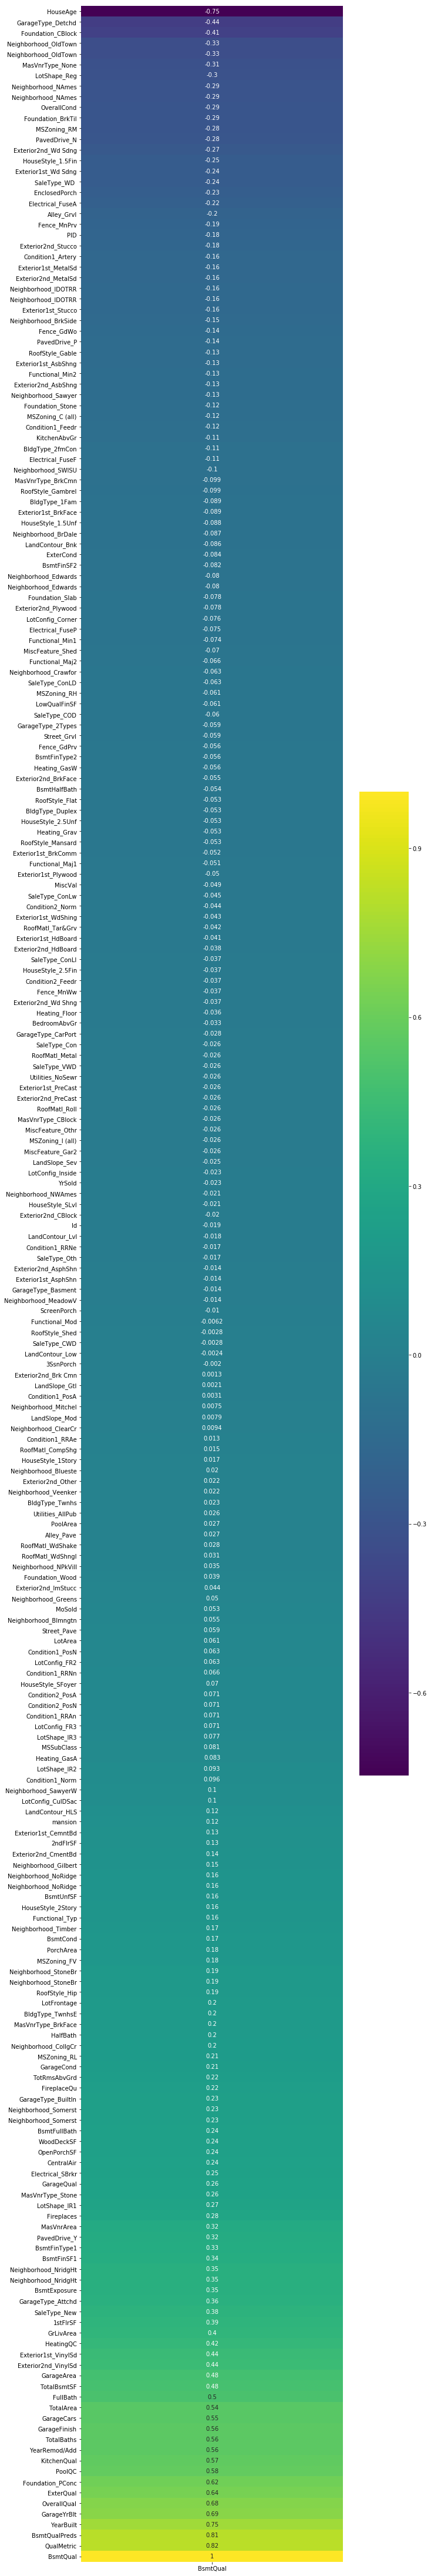

In [3]:
## Examining strongly correlated variables
plt.figure(figsize=(10,80))
sns.heatmap(pd.get_dummies(test).corr()[['BsmtQual']].sort_values('BsmtQual'),
            cmap='viridis', annot=True);                                 

#### Identified 'YearBuilt','OverallQual','HouseAge','ExterQual','KitchenQual' as variables I want to use

In [4]:
## Examining the variables for Nulls. I don't want to do third-level modeling
## (A model to predict features for a model to features for a model to predict SalePrice)
test[['YearBuilt','OverallQual','HouseAge','ExterQual','KitchenQual']].isna().sum()

YearBuilt      0
OverallQual    0
HouseAge       0
ExterQual      0
KitchenQual    0
dtype: int64

In [5]:
## Setting my X and y.
bsmt_qual_filter = ['BsmtQual','YearBuilt','OverallQual','ExterQual','KitchenQual']
bq_df = test[bsmt_qual_filter].dropna() ## There are no Nulls, but I like this method b/c it pushes regardless
y_test_bq = bq_df['BsmtQual']
X_test_bq = bq_df[bsmt_qual_filter].drop(columns=['BsmtQual'])

In [6]:
## Instantiating various models to try out
lr = LinearRegression()
lasso = LassoCV(cv=5)
ridge = RidgeCV(cv=5)
elast = ElasticNetCV(cv=5)

SS = StandardScaler()

X_test_bq_s = SS.fit_transform(X_test_bq)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [7]:
## Printout of key scores I want to evaluate my model with
print("Linear Regression\nCross Val Scores: ",
      cross_val_score(lr, X_test_bq_s, y_test_bq, cv=5))

print("Avg. CV Score: ", round(cross_val_score(lr,  X_test_bq_s, y_test_bq, cv=5).mean(),5))
print("\nLasso\nCross Val Score: ",
      cross_val_score(lasso,  X_test_bq_s, y_test_bq, cv=5))

print("Avg. CV Score: ", round(cross_val_score(lasso,  X_test_bq_s, y_test_bq, cv=5).mean(),5))
print("\nRidge\nCross Val Score: ", 
      cross_val_score(ridge,  X_test_bq_s, y_test_bq, cv=5))

print("Avg. CV Score: ", round(cross_val_score(ridge,  X_test_bq_s, y_test_bq, cv=5).mean(),5))
print("\nElastic Net\nCross Val Score: ", 
      cross_val_score(elast,  X_test_bq_s, y_test_bq, cv=5))

print("Avg. CV Score: ", round(cross_val_score(elast,  X_test_bq_s, y_test_bq, cv=5).mean(),5))

#### All pretty much identical... I will take Ridge

Linear Regression
Cross Val Scores:  [0.70442061 0.63686053 0.64545547 0.65924357 0.63319184]
Avg. CV Score:  0.65583

Lasso
Cross Val Score:  [0.70440949 0.63682327 0.64556353 0.65923178 0.63314592]
Avg. CV Score:  0.65583

Ridge
Cross Val Score:  [0.70446713 0.63679801 0.64770391 0.65811546 0.63262803]
Avg. CV Score:  0.65594

Elastic Net
Cross Val Score:  [0.70442639 0.63676878 0.64563551 0.65910292 0.63307855]
Avg. CV Score:  0.6558
